<a href="https://colab.research.google.com/github/Jaime-Gomez-Vera/Metodos-Numericos/blob/main/Diferencias_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultado: 125.0


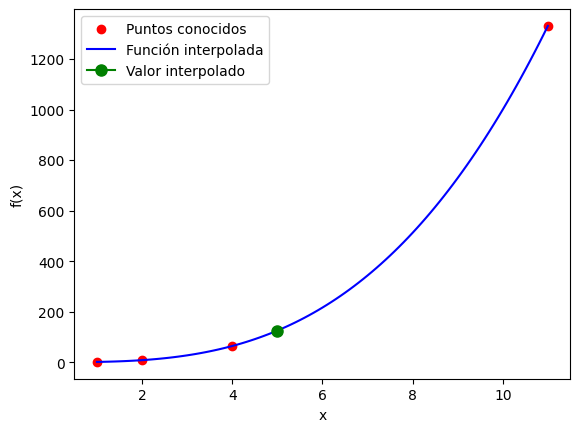

In [2]:
import matplotlib.pyplot as plt

def newton_differences(x, y):
    n = len(x)
    coefficients = [y[0]]

    for i in range(1, n):
        temp = []
        for j in range(n - i):
            temp.append((y[j+1] - y[j]) / (x[j+i] - x[j]))

        coefficients.append(temp[0])
        y = temp

    return coefficients

def newton_interpolation(x, coefficients, target_x):
    n = len(x)
    result = coefficients[0]

    for i in range(1, n):
        temp = 1
        for j in range(i):
            temp *= (target_x - x[j])
        result += coefficients[i] * temp

    return result


x = [1, 2, 4 ,5, 11]
y = [1, 8, 64, 125, 1331]
target_x = 5

coefficients = newton_differences(x, y)
result = newton_interpolation(x, coefficients, target_x)
print("Resultado:", result)


plt.scatter(x, y, color='red', label='Puntos conocidos')


interpolated_x = [min(x) + (max(x) - min(x)) * i / 100 for i in range(101)]
interpolated_y = [newton_interpolation(x, coefficients, val) for val in interpolated_x]

plt.plot(interpolated_x, interpolated_y, color='blue', label='Función interpolada')
plt.plot(target_x, result, marker='o', markersize=8, color='green', label='Valor interpolado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()